# `shippy`: a platform to import and analyze data on cruise tourism in SE Alaska.

# Tables and figures for the project and their source codes:

## Table 1. Entries to GLBA

* for each entry to Glacier Bay (GLBA), list of vessels with arrival/departure times, fromPort, toPort, distance and times to nextPort, and other relavent information using AIS data from 2023. (258 rows if compatible with CLAA 2023 Calendar)

In [1]:
from app import App
from BoatsData import BoatsData
from BoatData import BoatData
from Cruise import Cruise
import pandas as pd
import os


a = App(r'./data/ais_data')

created new cruise for this: NORWEGIAN BLISS_01
created new cruise for this: NORWEGIAN BLISS_02
created new cruise for this: NORWEGIAN JEWEL_01
created new cruise for this: EURODAM_01
created new cruise for this: NORWEGIAN BLISS_03
created new cruise for this: NIEUW AMSTERDAM_01
created new cruise for this: GRAND PRINCESS_01
created new cruise for this: KONINGSDAM_01
created new cruise for this: NORWEGIAN JEWEL_02
created new cruise for this: NORWEGIAN SPIRIT_01
created new cruise for this: CROWN PRINCESS_01
created new cruise for this: EURODAM_02
created new cruise for this: GRAND PRINCESS_02
created new cruise for this: KONINGSDAM_02
created new cruise for this: NORWEGIAN BLISS_04
created new cruise for this: NOORDAM_01
created new cruise for this: NORWEGIAN ENCORE_01
created new cruise for this: RUBY PRINCESS_01
created new cruise for this: NIEUW AMSTERDAM_02
created new cruise for this: NORWEGIAN SPIRIT_02
created new cruise for this: VOLENDAM_01
created new cruise for this: NORWEG

In [2]:
boatsData = a.boatsData
ais_data = boatsData.flatten() # extract all AIS data to one spot
ais_data.mmsi = ais_data.mmsi.astype(int).astype(str)
ais_data.imo = ais_data.imo.astype(int).astype(str)


visit_table, ais_data_glba_to_next_port, merged, count_glba_visits = boatsData.run_glba_workflow()

processing NORWEGIAN BLISS
processing NORWEGIAN JEWEL
processing EURODAM
processing NIEUW AMSTERDAM
processing GRAND PRINCESS
processing KONINGSDAM
processing NORWEGIAN SPIRIT
processing CROWN PRINCESS
processing NOORDAM
processing NORWEGIAN ENCORE
processing RUBY PRINCESS
processing VOLENDAM
processing NORWEGIAN SUN
processing SEABOURN ODYSSEY
processing VIKING ORION
processing SAPPHIRE PRINCESS
processing ROYAL PRINCESS
processing MAJESTIC PRINCESS
processing QUEEN ELIZABETH


In [3]:
visit_table

,index,date,boatName,mmsi,imo,portAfter,portBefore,ts_in,ts_out,timeTo,distTo,mean_sog,max_sog,segment_id
0,6,2023-04-19,NORWEGIAN BLISS,311000710,9751509,Ketchikan,Skagway,2023-04-19 06:11:19-08:00,2023-04-19 14:34:25-08:00,16.19,299.91,16.323225,22.9,NORWEGIAN BLISS_5
1,0,2023-04-26,NORWEGIAN BLISS,311000710,9751509,Ketchikan,Skagway,2023-04-26 06:13:39-08:00,2023-04-26 15:01:27-08:00,15.81,300.57,17.261258,23.5,NORWEGIAN BLISS_13
2,33,2023-05-02,EURODAM,245206000,9378448,Icy Strait Point,Juneau,2023-05-02 06:35:16-08:00,2023-05-02 15:18:13-08:00,2.55,29.28,11.752113,16.1,EURODAM_3
3,1,2023-05-03,NORWEGIAN BLISS,311000710,9751509,Ketchikan,Skagway,2023-05-03 06:11:13-08:00,2023-05-03 14:49:12-08:00,15.99,301.96,17.163619,22.9,NORWEGIAN BLISS_19
4,53,2023-05-04,NIEUW AMSTERDAM,246648000,9378450,Ketchikan,Skagway,2023-05-04 05:59:19-08:00,2023-05-04 15:06:28-08:00,19.71,329.22,15.493727,22.8,NIEUW AMSTERDAM_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,4,2023-10-18,NORWEGIAN BLISS,311000710,9751509,Ketchikan,Skagway,2023-10-18 07:58:35-08:00,2023-10-18 15:45:29-08:00,15.43,301.17,17.323282,23.7,NORWEGIAN BLISS_215
254,132,2023-10-19,NORWEGIAN ENCORE,311000879,9751511,Ketchikan,Skagway,2023-10-19 07:49:18-08:00,2023-10-19 16:00:01-08:00,15.05,302.49,18.044065,24.0,NORWEGIAN ENCORE_145
255,182,2023-10-24,NORWEGIAN SUN,311109000,9218131,Juneau,Skagway,2023-10-24 07:12:33-08:00,2023-10-24 15:48:46-08:00,14.45,205.99,13.812389,20.3,NORWEGIAN SUN_221
256,5,2023-10-25,NORWEGIAN BLISS,311000710,9751509,Ketchikan,Skagway,2023-10-25 08:04:14-08:00,2023-10-25 15:37:12-08:00,14.96,302.54,17.850089,24.3,NORWEGIAN BLISS_219


In [4]:
visit_count_table = visit_table.boatName.value_counts()
visit_count_table

NORWEGIAN ENCORE     25
KONINGSDAM           22
EURODAM              22
NIEUW AMSTERDAM      21
GRAND PRINCESS       20
SAPPHIRE PRINCESS    20
ROYAL PRINCESS       20
VOLENDAM             20
MAJESTIC PRINCESS    19
NOORDAM              19
NORWEGIAN JEWEL      11
NORWEGIAN SUN         8
NORWEGIAN BLISS       7
RUBY PRINCESS         7
QUEEN ELIZABETH       6
VIKING ORION          4
SEABOURN ODYSSEY      4
NORWEGIAN SPIRIT      2
CROWN PRINCESS        1
Name: boatName, dtype: int64

In [ ]:
popular_next_ports_table = visit_table.portAfter.value_counts()
popular_next_ports_table

### Table 1a. merged table with scheduled times from CLAA pdf

In [ ]:
merged

## Table 2. Summary statistics

*  __for each port after GLBA__: 
_mean, std, count_ for AIS data (leg from GLBA to nextPort): 'sog', 'distanceToNextPort', 'timeToNextPort'

In [5]:
from Statistics import Statistics

summary_table_groupby_next_port = Statistics.summary_table2(visit_table, 'portAfter',
                                                          ['mean_sog', 'timeTo', 'distTo'], ['mean','std','count'])
summary_table_groupby_next_port

,portAfter,mean_sog_mean,mean_sog_std,mean_sog_count,timeTo_mean,timeTo_std,timeTo_count,distTo_mean,distTo_std,distTo_count
0,Haines,11.533295,2.722576,2,13.180000,0.664680,2,324.780000,260.116301,2
1,Icy Strait Point,12.011863,1.596100,36,4.050833,5.126022,36,43.049444,39.381160,36
2,Juneau,12.984979,2.501495,4,15.740000,3.716001,4,320.207500,279.849053,4
3,Ketchikan,16.412651,1.438272,105,17.233333,1.994910,105,317.875429,136.474420,105
4,Prince Rupert,16.624561,0.202767,2,20.825000,0.091924,2,399.915000,2.778930,2
5,Seward,13.871948,0.319258,10,13.595000,0.351133,10,543.274000,7.811061,10
6,Sitka,11.039107,1.425427,6,14.705000,1.771460,6,406.398333,629.533870,6
7,Skagway,10.774321,1.222777,43,11.437907,1.999827,43,130.125581,34.976723,43
8,Valdez,13.176263,0.133918,2,14.810000,1.202082,2,515.365000,2.312239,2
9,Whittier,13.949818,0.797486,45,8.109333,1.025682,45,518.778000,5.707146,45


## Table 3.  Vessels in CLAA database via _mmsi_

In [9]:
ais_unique_vessels = ais_data[['name', 'mmsi', 'imo']].drop_duplicates()
ais_unique_vessels.reset_index()

,index,name,mmsi,imo
0,0,NORWEGIAN BLISS,311000710,9751509
1,68019,NORWEGIAN JEWEL,311827000,9304045
2,140800,EURODAM,245206000,9378448
3,200460,NIEUW AMSTERDAM,246648000,9378450
4,261280,GRAND PRINCESS,310327000,9104005
5,324925,KONINGSDAM,244830547,9692557
6,380510,NORWEGIAN SPIRIT,311746000,9141065
7,442661,CROWN PRINCESS,310500000,9293399
8,495800,NOORDAM,246028000,9230115
9,560320,NORWEGIAN ENCORE,311000879,9751511


In [4]:
claa_df = pd.read_csv('./data/calendar/allyears_allports_claa.csv')
ports = claa_df.sort_values(by='date')
ports 

,Unnamed: 0,date,boatName,portCode,ts_in,ts_out,portName,nextPort
24148,24148,2008-04-27,NORWEGIAN STAR,VAN,2008-04-27 07:00:00,2008-04-27 17:00:00,VANCOUVER,AT SEA
23685,23685,2008-04-27,MERCURY,SFO,2008-04-27 07:00:00,2008-04-27 17:00:00,SAN FRANCISCO,AT SEA
23686,23686,2008-04-28,MERCURY,AS,2008-04-28 06:00:00,2008-04-28 22:00:00,AT SEA,AT SEA
23399,23399,2008-04-28,INFINITY,SFO,2008-04-28 07:00:00,2008-04-28 17:00:00,SAN FRANCISCO,AT SEA
24149,24149,2008-04-28,NORWEGIAN STAR,AS,2008-04-28 06:00:00,2008-04-28 22:00:00,AT SEA,KETCHIKAN
...,...,...,...,...,...,...,...,...
40516,40516,2023-10-28,NORWEGIAN SUN,AS,2023-10-28 06:00:00,2023-10-28 22:00:00,AT SEA,VICTORIA
40042,40042,2023-10-28,NORWEGIAN ENCORE,VIC,2023-10-28 20:00:00,2023-10-28 23:59:00,VICTORIA,SEATTLE
40517,40517,2023-10-29,NORWEGIAN SUN,VIC,2023-10-29 08:00:00,2023-10-29 18:00:00,VICTORIA,SEATTLE
40043,40043,2023-10-29,NORWEGIAN ENCORE,SEA,2023-10-29 06:00:00,2023-10-29 17:00:00,SEATTLE,NaN


### Histogram: number of unique ships in each year across all years

In [ ]:
import matplotlib.pyplot as plt
portChanges = pd.DataFrame()

grouped = ports.groupby('year', dropna = True)
for year, group in grouped:
        unique_ports = len(group.portName.unique())
        new_row = {'year' : year,
                   'unique_ship_calls' : unique_ports}
        portChanges = pd.concat([portChanges, pd.DataFrame([new_row])])

plt.figure(figsize=(10,4.5))
bars = plt.bar(portChanges['year'], portChanges['unique_ports'], color='skyblue', edgecolor='black')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of unique Port Calls by Year, CLAA 2008-2023')
plt.xticks(portChanges['year']) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# Show the plot
plt.show()

## Table 4. Historical port calls from 2008-2024

In [10]:
ports = claa_df[['date', 'boatName','portName', 'nextPort']]
ports = ports[ports['portName']!= 'AT SEA']
ports[['mmsi', 'imo', 'length', 'width', 'pax', 'gross_tonnage']] = None
ports['year'] = pd.to_datetime(ports['date']).dt.year

ports


,date,boatName,portName,nextPort,mmsi,imo,length,width,pax,gross_tonnage,year
0,2010-05-03,AMSTERDAM,SEATTLE,AT SEA,None,None,None,None,None,None,2010
2,2010-05-05,AMSTERDAM,GLACIER BAY,JUNEAU,None,None,None,None,None,None,2010
3,2010-05-06,AMSTERDAM,JUNEAU,SITKA,None,None,None,None,None,None,2010
4,2010-05-07,AMSTERDAM,SITKA,KETCHIKAN,None,None,None,None,None,None,2010
5,2010-05-08,AMSTERDAM,KETCHIKAN,VICTORIA,None,None,None,None,None,None,2010
...,...,...,...,...,...,...,...,...,...,...,...
68370,2019-09-27,WESTERDAM,KETCHIKAN,AT SEA,None,None,None,None,None,None,2019
68372,2019-09-29,WESTERDAM,VANCOUVER,AT SEA,None,None,None,None,None,None,2019
68374,2019-10-01,WESTERDAM,JUNEAU,NaN,None,None,None,None,None,None,2019
68375,2019-09-10,WORLD OF RESIDENSE,NOME,NOME,None,None,None,None,None,None,2019


### Histogram: number of unique ports in each year across all years

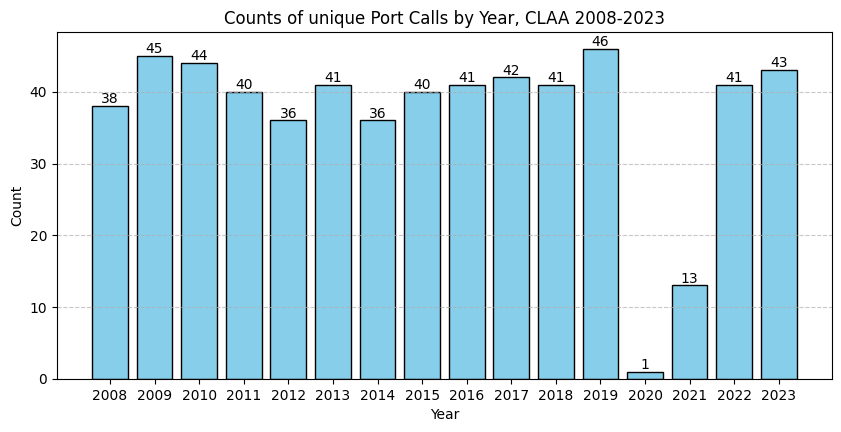

In [14]:
import matplotlib.pyplot as plt
portChanges = pd.DataFrame()

grouped = ports.groupby('year', dropna = True)
for year, group in grouped:
        unique_ports = len(group.portName.unique())
        new_row = {'year' : year,
                   'unique_ports' : unique_ports}
        portChanges = pd.concat([portChanges, pd.DataFrame([new_row])])

plt.figure(figsize=(10,4.5))
bars = plt.bar(portChanges['year'], portChanges['unique_ports'], color='skyblue', edgecolor='black')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of unique Port Calls by Year, CLAA 2008-2023')
plt.xticks(portChanges['year']) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# Show the plot
plt.show()

### Table 4a. for each port, year: count vessels (unique or total?), total max pax, firstOfSeason, lastOfSeason, 

In [15]:
### Calculate statistics per port per year and display table
# ports = claa_df with a few append cols
ports = ports[['date', 'boatName', 'portName', 'year', 'pax', 'length', 'width', 'gross_tonnage']]

stats_list = []
grouped = ports.groupby(['portName', 'year'])

for (port, year), group in grouped:
    first_call = min(group.date)
    last_call = max(group.date)

    cumulative_pax = group['pax'].sum()
    count_calls = group['boatName'].count()
    mean_width = group['width'].mean()
    mean_length = group['length'].mean()
    count_unique = len(group['boatName'].unique())
    
    stats = {
        'portName': port,
        'year': year,
        'count_calls' : count_calls,
        'count_unique' : count_unique, # number of unique boats visiting each port per year
        'max_pax' : cumulative_pax,
        'first_call' : first_call,
        'last_call' : last_call,
        'mean_width' : mean_width,
        'mean_length' : mean_length
    }
    stats_list.append(stats)

stats_df = pd.DataFrame(stats_list)
stats_df


,portName,year,count_calls,count_unique,max_pax,first_call,last_call,mean_width,mean_length
0,ADAK,2008,1,1,0,2008-09-09,2008-09-09,NaN,NaN
1,ADAK,2009,1,1,0,2009-09-13,2009-09-13,NaN,NaN
2,ADAK,2010,1,1,0,2010-08-04,2010-08-04,NaN,NaN
3,ADAK,2011,1,1,0,2011-06-24,2011-06-24,NaN,NaN
4,ADAK,2012,1,1,0,2012-07-07,2012-07-07,NaN,NaN
...,...,...,...,...,...,...,...,...,...
583,WRANGELL,2018,30,5,0,2018-05-25,2018-10-03,NaN,NaN
584,WRANGELL,2019,37,8,0,2019-05-21,2019-10-03,NaN,NaN
585,WRANGELL,2021,3,1,0,2021-08-01,2021-09-12,NaN,NaN
586,WRANGELL,2022,62,10,0,2022-05-12,2022-09-25,NaN,NaN


### Table 4b. __Dynamic Table__: For _PortA_, for each year and each next port of call outside of _PortA_, include count of ships, distance to travel, 

## Table 5. Glaciers as destinations

* for each year, count of visits to a port call with a glacier: (GLBA, Hubbard, College Fjord, Endicot, Tracey)

## Map 1: representative routes for each port call after GLBA, heatmap style from 2023 AIS data

In [3]:
from Mapper import Mapper

#instantiate and write rasters to output folder as well as store their info in dict for plotting
rasters_dict = Mapper(ais_data_glba_to_next_port).writeRasters('next_port', 'sog')

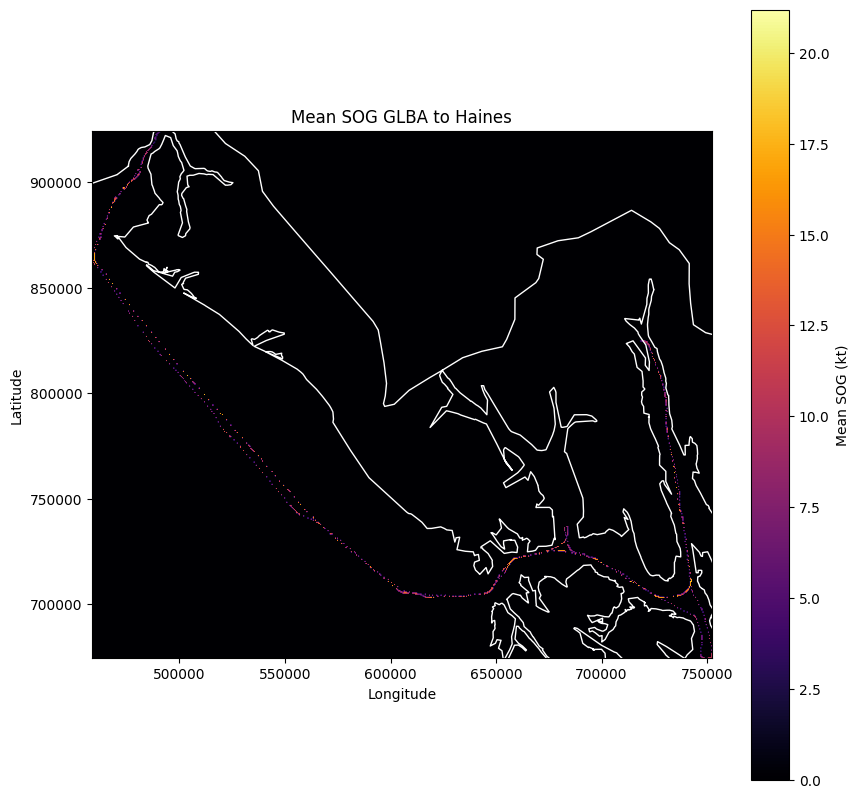

In [5]:
Mapper.plotRaster('Haines', rasters_dict)

## Map 2: apply __management alternatives__ to AIS data to plot updated speeds onto maps to each port after GLBA

### Table 6. produce table with appended fields showing new avg sog, emissions factors, etc, for each alternative (15 min, 30 min, etc.)


In [3]:
data = ais_data_glba_to_next_port
assert(len(data.segment_id.unique()) == 258) # confirm we have all the data we need



In [4]:
from Geoprocessor import Geoprocessor
alts = Geoprocessor.generate_management_alternatives(data, 'segment_id', [-30, 15, 30, 60])


In [13]:
for key, value in alts.items():
    print(key, ' ', len(value))
    pass

CROWN PRINCESS_161_dec_-30   409
CROWN PRINCESS_161_inc_15   409
CROWN PRINCESS_161_inc_30   409
CROWN PRINCESS_161_inc_60   409
EURODAM_101_dec_-30   124
EURODAM_101_inc_15   124
EURODAM_101_inc_30   124
EURODAM_101_inc_60   124
EURODAM_113_dec_-30   145
EURODAM_113_inc_15   145
EURODAM_113_inc_30   145
EURODAM_113_inc_60   145
EURODAM_121_dec_-30   138
EURODAM_121_inc_15   138
EURODAM_121_inc_30   138
EURODAM_121_inc_60   138
EURODAM_131_dec_-30   154
EURODAM_131_inc_15   154
EURODAM_131_inc_30   154
EURODAM_131_inc_60   154
EURODAM_141_dec_-30   134
EURODAM_141_inc_15   134
EURODAM_141_inc_30   134
EURODAM_141_inc_60   134
EURODAM_153_dec_-30   154
EURODAM_153_inc_15   154
EURODAM_153_inc_30   154
EURODAM_153_inc_60   154
EURODAM_163_dec_-30   146
EURODAM_163_inc_15   146
EURODAM_163_inc_30   146
EURODAM_163_inc_60   146
EURODAM_171_dec_-30   149
EURODAM_171_inc_15   149
EURODAM_171_inc_30   149
EURODAM_171_inc_60   149
EURODAM_183_dec_-30   139
EURODAM_183_inc_15   139
EURODAM_183_

In [14]:
test = alts['VOLENDAM_99_inc_15']
test[['bs_ts', 'bs_ts_new', 'delta_t', 'delta_t_new', 'sog', 'sog_new', 'name', 'next_port']]

,bs_ts,bs_ts_new,delta_t,delta_t_new,sog,sog_new,name,next_port
0,2023-07-23 15:03:29-08:00,2023-07-23 15:03:29-08:00,NaN,NaN,11.8,11.648716,VOLENDAM,Ketchikan
1,2023-07-23 15:03:49-08:00,2023-07-23 15:03:49.259744-08:00,0.333333,0.337662,12.1,11.944870,VOLENDAM,Ketchikan
2,2023-07-23 15:04:09-08:00,2023-07-23 15:04:09.519488-08:00,0.333333,0.337662,12.4,12.241023,VOLENDAM,Ketchikan
3,2023-07-23 15:04:29-08:00,2023-07-23 15:04:29.779232-08:00,0.333333,0.337662,12.7,12.537177,VOLENDAM,Ketchikan
4,2023-07-23 15:05:09-08:00,2023-07-23 15:05:10.298720060-08:00,0.666667,0.675325,13.3,13.129485,VOLENDAM,Ketchikan
...,...,...,...,...,...,...,...,...
525,2023-07-24 10:14:59-08:00,2023-07-24 10:29:56.285675120-08:00,0.666667,0.675325,1.9,1.875641,VOLENDAM,Ketchikan
526,2023-07-24 10:15:32-08:00,2023-07-24 10:30:29.714252720-08:00,0.550000,0.557143,1.4,1.382051,VOLENDAM,Ketchikan
527,2023-07-24 10:16:19-08:00,2023-07-24 10:31:17.324651120-08:00,0.783333,0.793507,1.0,0.987179,VOLENDAM,Ketchikan
528,2023-07-24 10:18:00-08:00,2023-07-24 10:32:59.636358380-08:00,1.683333,1.705195,0.8,0.789743,VOLENDAM,Ketchikan


In [11]:
test = alts['EURODAM_101_dec_-30']
test[['bs_ts', 'bs_ts_new', 'delta_t', 'delta_t_new', 'sog', 'sog_new', 'name', 'next_port']]


,bs_ts,bs_ts_new,delta_t,delta_t_new,sog,sog_new,name,next_port
0,2023-07-11 15:33:09-08:00,2023-07-11 15:33:09-08:00,NaN,NaN,10.6,14.117699,EURODAM,Icy Strait Point
1,2023-07-11 15:33:49-08:00,2023-07-11 15:33:39.033222600-08:00,0.666667,0.500554,11.1,14.783628,EURODAM,Icy Strait Point
2,2023-07-11 15:34:28-08:00,2023-07-11 15:34:08.315614620-08:00,0.650000,0.488040,11.7,15.582743,EURODAM,Icy Strait Point
3,2023-07-11 15:35:09-08:00,2023-07-11 15:34:39.099667800-08:00,0.683333,0.513068,12.2,16.248673,EURODAM,Icy Strait Point
4,2023-07-11 15:35:59-08:00,2023-07-11 15:35:16.641196020-08:00,0.833333,0.625692,12.9,17.180973,EURODAM,Icy Strait Point
...,...,...,...,...,...,...,...,...
119,2023-07-11 17:28:12-08:00,2023-07-11 16:59:31.983388680-08:00,2.333333,1.751938,2.1,2.796903,EURODAM,Icy Strait Point
120,2023-07-11 17:30:23-08:00,2023-07-11 17:01:10.342192680-08:00,2.183333,1.639313,2.1,2.796903,EURODAM,Icy Strait Point
121,2023-07-11 17:32:32-08:00,2023-07-11 17:02:47.199335520-08:00,2.150000,1.614286,1.5,1.997788,EURODAM,Icy Strait Point
122,2023-07-11 17:33:23-08:00,2023-07-11 17:03:25.491694380-08:00,0.850000,0.638206,0.9,1.198673,EURODAM,Icy Strait Point


190.67195601851856

In [9]:
print(adj.bs_ts.iloc[-1] - adj.bs_ts.iloc[0])


190 days 16:07:37


In [ ]:
#T_original = (adj.bs_ts.iloc[-1] - adj.bs_ts.iloc[0]) assert this is correct
ratio = (T + increment) / T

adj['delta_t_new'] = adj['delta_t'] * ratio
adj['sog_new'] = adj['sog'] / ratio

In [ ]:
adj = data.sort_values(by='bs_ts').reset_index(drop=True)
adj['delta_t'] = adj['bs_ts'].diff().dt.total_seconds / 60 # get timedelta in minutes
T = adj['delta_t'].sum()
print(adj.bs_ts.iloc[-1] - adj.bs_ts.iloc[0])
#T_original = (adj.bs_ts.iloc[-1] - adj.bs_ts.iloc[0]) assert this is correct
ratio = (T + increment) / T

adj['delta_t_new'] = adj['delta_t'] * ratio
adj['sog_new'] = adj['sog']
sog_new = adj.sog / ratio